## Decision Trees  
In this section, we will introduce decision trees as a predictive model that takes a unique approach from logistic regression. Decision trees and their related models are highly effective for general machine learning applications and are relatively easy to interpret.  
Decision trees base their decisions on a bunch of if conditions on features to reach their end output. They are capable of capturing non-linear effects of features. Due to their resemblance to the way humans make logical decisions, decision trees have an intuitive structure. As such they are a highly interpretable type of mathematical model.

In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn import tree

# A Decision Tree in Scikit-Learn

Loading the cleaned data

In [2]:
df = pd.read_csv('final_cleaned_data.csv')

In [3]:
features_response = df.columns.tolist()

Removing the columns that are not features or the response variable

In [4]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [5]:
filtered_response = []
for item in features_response:
    if item not in items_to_remove:
        filtered_response.append(item)
features_response = filtered_response
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Here we split the data based into test and train set for our model. We allot 20 percent of the samples for testing our model. Now, let us instantiate a decision tree class of depth = 2 and train the mddel.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(items_to_remove+["default payment next month"], axis=1).values, \
                                                    df["default payment next month"].values, \
                                                    test_size=0.2, random_state=24)

In [7]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [8]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Now we plot the graphical representation of the decision tree using the graphviz package

In [9]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True,
                                feature_names=features_response[:len(features_response)-1], proportion=True,
                                class_names=['Not defaulted', 'Defaulted']) 


(process:1512): Pango-WARNING **: 20:45:35.970: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


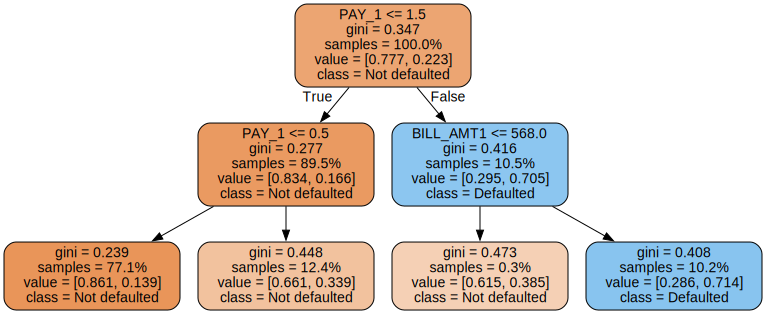

In [10]:
graph = graphviz.Source(dot_data) 
graph

Here we see that the depth of the tree is 2. The orange boxes are the ones classified into the negative classes whereas the blue ones are the positive classes. The intensity also gives us an indication of the class fractions with more intense shades having a higher fractions of class fraction in the respective node. In the first layer the decision to go left or right is based on whether the value of PAY_1 $\leq$ 1.5. In the second layer the splitting of nodes is based on two parameters again namely, PAY_1 if true and BILL_AMT_1 if false. In a particular node decision trees determine the class by considering the majority class of the training samples in that node.  

# Training Decision Trees: Node Impurity

Decision trees split in such a way so that each node has a higher purity. In other words as we split it into more and more pure nodes. The inverse of purity, or node impurity, is used in practice to train decision trees.  
Node impurity is a measure of how far a node is from having 100% of the training samples belonging to one class, and it is analogous to a cost function. The most intuitive concept of node impurity is the misclassification rate, which is the proportion of the less common class in a node. In a binary classification problem, there are only two classes: k = 0 and k = 1. The misclassification rate is used to determine the best split at each node. The fraction of samples belonging to the negative class, pm0, is considered between 0.01 and 0.99 of the total samples in a node, and the fraction of samples belonging to the positive class is one minus pm0. The misclassification rate for a node is the smaller of pm0 and pm1. 

In [11]:
dt.max_depth = None

In [12]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
pm0 = np.arange(0.01, 1, 0.01)
pm1 = 1 - pm0

In [14]:
misclassification_rate = np.minimum(pm0, pm1)

In [15]:
misclassification_rate

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45,
       0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34,
       0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01])

The decision tree algorithm splits nodes into two new nodes to reduce misclassification rate. It considers all features and their possible thresholds to find the best split, which is the one that results in the lowest impurity, calculated as the average impurity across the two new nodes. This process is repeated until a stopping criterion is reached. The algorithm aims to find the feature and threshold that will result in the lowest misclassification rate.

### Gini
$$ \sum_k  p_{mk} (1-p_{mk}) $$

In [16]:
gini = (pm0 * (1-pm0)) + (pm1 * (1-pm1))

### Cross Entropy  
$$ \sum_k  p_{mk}log(1-p_{mk}) $$

In [17]:
cross_ent = -1*( (pm0 * np.log(pm0)) + (pm1 * np.log(pm1)) )

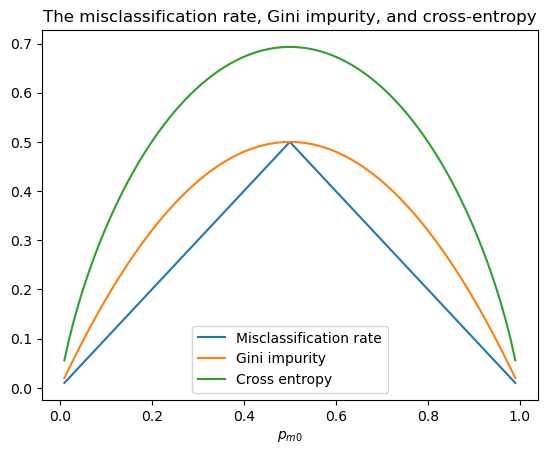

In [18]:
# mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')
plt.title("The misclassification rate, Gini impurity, and cross-entropy")
plt.xlabel('$p_{m0}$')
plt.legend()
plt.show()

# Using Decision Trees: Advantages and Predicted Probabilities

In [19]:
from sklearn.datasets import make_circles

The make_circles() function generates a 2D binary classification dataset where the samples are drawn from two concentric circles. The n_samples parameter determines the number of samples to generate. The shuffle parameter specifies whether to shuffle the samples before returning them or not. The noise parameter adds Gaussian noise to the samples, while the random_state parameter sets the seed used by the random number generator for reproducibility. Finally, the factor parameter sets the ratio of the inner to outer radius of the circles. X_circ gives us the location of the samples and y_circ gives us the label of the circles.  

In [20]:
X_circ, y_circ = make_circles(n_samples = 300, shuffle=True,
                             noise=0.1, random_state=1, factor=0.4)

In [21]:
from matplotlib.colors import ListedColormap

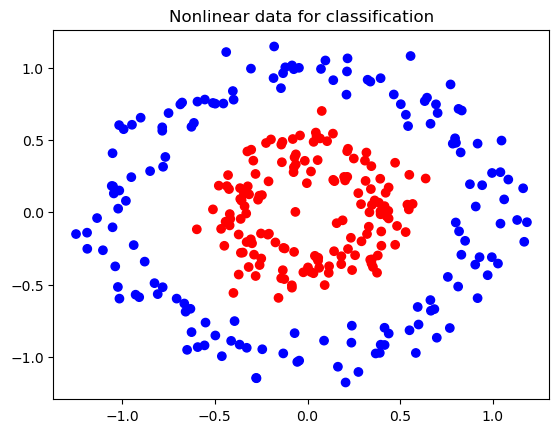

In [22]:
plt.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap=ListedColormap(['blue', 'red']))
plt.title('Nonlinear data for classification')
plt.show()

In [23]:
x, y = X_circ[:, 0], X_circ[:, 1]
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
extent = [x_min - 0.5, x_max + 0.5, y_min - 0.5, y_max + 0.5]

step = 0.02
xx, yy = np.mgrid[x_min-0.5:x_max+0.5:step, y_min-0.5:y_max+0.5:step]


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
classifiers = [tree.DecisionTreeClassifier(max_depth=4, random_state=4), LogisticRegression()]
titles = ['Decision tree', 'Logistic regression']

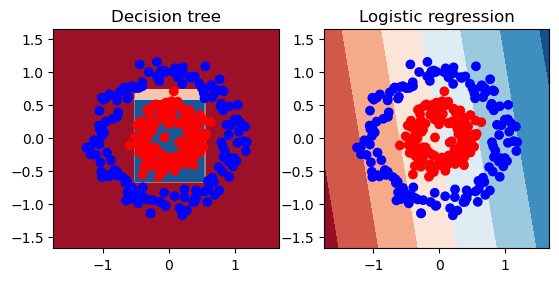

In [26]:
for i, (classif, title) in enumerate(zip(classifiers, titles)):
    plt.subplot(1, 2, i+1)
    classif.fit(X_circ, y_circ)
    Z = classif.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=1)
    plt.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap= ListedColormap(['blue', 'red']))
    plt.gca().set_aspect('equal')
    plt.title(title)
plt.show()

# Finding Optimal Hyperparameters for a Decision Tree

The GridSearchCV function performs a comprehensive search over all the combinations of hyperparameters that we specify, in order to find the optimal combination that yields the best performance of a given machine learning model. This process involves trying out every possible combination of hyperparameters from the specified search space, which can be an exhaustive and time-consuming task. For example if we have, three parameters each having three variables, we will end up running it about 3 x 3 x 3 = 27 times.   
However, this exhaustive search approach is useful because it guarantees that the best possible combination of hyperparameters is found, given the search space and data.  

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
params = {'max_depth':np.arange(1, 13)}

In [29]:
dt = tree.DecisionTreeClassifier()

The GridSearchCV function can expedite the hyperparameter tuning process by automating the cross-validation process

In [30]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan,
                  return_train_score=True)

In [31]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [32]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.032237,0.003005,0.003756,0.002485,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,12,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.057121,0.005333,0.003153,0.000235,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,9,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.080313,0.003608,0.003814,0.001055,3,{'max_depth': 3},0.719980,0.728065,0.743514,0.724267,0.728957,0.008878,6,0.741871,0.737743,0.733329,0.732286,0.736307,0.003810
3,0.119792,0.027485,0.003814,0.000465,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,4,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
4,0.126221,0.004145,0.004843,0.002166,5,{'max_depth': 5},0.743204,0.739694,0.756493,0.738636,0.744507,0.007124,2,0.771849,0.766688,0.763817,0.763489,0.766461,0.003351
5,0.144930,0.001884,0.004165,0.001276,6,{'max_depth': 6},0.744848,0.745914,0.752309,0.741588,0.746164,0.003889,1,0.782202,0.780125,0.775228,0.774776,0.778083,0.003171
6,0.156372,0.011203,0.003631,0.000729,7,{'max_depth': 7},0.741257,0.735940,0.753127,0.743220,0.743386,0.006223,3,0.795379,0.793188,0.788374,0.786524,0.790866,0.003564
7,0.226020,0.039670,0.005500,0.000502,8,{'max_depth': 8},0.728625,0.732872,0.749786,0.730883,0.735541,0.008360,5,0.811837,0.808353,0.803345,0.801959,0.806374,0.003951
8,0.283312,0.016033,0.005460,0.001095,9,{'max_depth': 9},0.717078,0.719228,0.730763,0.727631,0.723675,0.005683,7,0.831160,0.830205,0.820797,0.818536,0.825175,0.005576
9,0.333726,0.009595,0.006226,0.001284,10,{'max_depth': 10},0.710478,0.705523,0.720117,0.713873,0.712498,0.005307,8,0.848893,0.853897,0.841275,0.836985,0.845263,0.006560


The standard error of the mean is a measure of uncertainty in the sample mean. It represents the standard deviation of the sampling distribution of the sample mean, which is a distribution of means obtained by repeatedly sampling from a theoretical, larger population of similar samples. The variance of this sampling distribution, depends on the sample size and the variance of the larger, unobserved population. To estimate, we can use the variance of the population of testing folds that we do observe. If we have the standard deviation of the sample mean, we can obtain the standard error of the mean by taking the square root of the variance of the sampling distribution. The standard error of the mean is useful for constructing error bars and evaluating the uncertainty associated with the sample mean.  
Note that standard errors are defiend as the standard deviation divided by the square root of the number of folds.

Text(0, 0.5, 'ROC AUC')

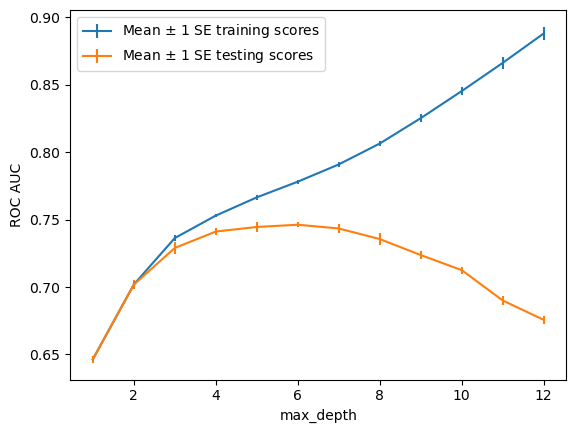

In [33]:
plt.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_train_score'], 
            yerr=cv_results_df['std_train_score']/np.sqrt(4), label='Mean $\pm$ 1 SE training scores')
plt.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4), label='Mean $\pm$ 1 SE testing scores')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [34]:
cv.best_params_

{'max_depth': 6}

We find that the a depth of 6 is optimal for the test set

# Cross-Validation Grid Search with Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

Random forests are ensemble models formed by combining many decision trees. The number of decision trees included in a random forest is specified by the hyperparameter n_estimators, with larger numbers generally leading to better performance. By combining many models, random forests can improve upon the deficiencies of any individual model, resulting in better generalization to new data. As the number of trees in the ensemble increases, the variance of the overall ensemble decreases, resulting in increased testing scores up to a certain point, after which further increasing the number of trees does not substantially improve performance.  
Random forests reduce decision tree overfitting by making the trees different in two ways: by selecting a specific subset of features to consider at each split and by using different training samples to grow each tree. This introduces diversity and randomness, reducing variance and preventing overfitting.

In [36]:
rf_params = {'max_depth':[3, 6, 9, 12], 'n_estimators':[10, 50, 100, 200]}

In a random forest, the trees differ from each other because they are grown with different training samples created through bootstrapping. Bootstrapping involves generating synthetic datasets by randomly selecting samples from the original dataset with replacement. This procedure is called bagging and can be used with any machine learning model. Scikit-learn provides functionality for both classification and regression problems. In a random forest, bagging is turned on by default with the bootstrap option set to True.

In [37]:
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

Classification trees produce a predicted class for an input sample, and combining the predictions of multiple trees in a random forest can be done through taking a majority vote or adding up the predicted probabilities for each class and choosing the one with the highest probability sum. Scikit-learn uses the latter approach, which captures more information from each tree than just the predicted class.  
In this case we will try and classify to see if a credit account will default or not.  

In [38]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc', n_jobs=-1, refit=True, cv=4, verbose=2,
                     error_score=np.nan, return_train_score=True)

In [39]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


c:\Users\rahna\miniconda3\envs\dspwp2\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, max_features='auto',
                                              n_estimators=10, random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [40]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)
cv_rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.343868,0.013811,0.013878,0.001181,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,15,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,1.571429,0.093574,0.049027,0.003478,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,12,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
2,3.135125,0.167940,0.114374,0.006702,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,13,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
3,7.913801,0.357746,0.214653,0.009217,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,14,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
4,0.652776,0.028725,0.018207,0.001601,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.752905,0.758904,0.780036,0.774017,0.766466,0.010980,11,0.795911,0.796476,0.793695,0.796446,0.795632,0.001141
5,3.468104,0.190758,0.090388,0.029442,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760089,0.765251,0.788567,0.778669,0.773144,0.011193,8,0.807081,0.805109,0.799176,0.801229,0.803149,0.003113
6,6.880130,0.289074,0.130305,0.010645,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.760964,0.765515,0.788793,0.778936,0.773552,0.011004,7,0.808194,0.806130,0.800846,0.803123,0.804573,0.002808
7,13.299841,0.261245,0.253255,0.024871,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.761481,0.765319,0.787854,0.779745,0.773600,0.010682,6,0.808276,0.806853,0.800682,0.804006,0.804954,0.002906
8,1.058381,0.078928,0.023755,0.003463,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.757853,0.755444,0.781544,0.773823,0.767166,0.010899,10,0.854161,0.856197,0.850317,0.852039,0.853178,0.002211
9,4.881692,0.287959,0.081318,0.004450,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.763956,0.764420,0.786690,0.780255,0.773830,0.009908,4,0.867242,0.871380,0.868213,0.867390,0.868557,0.001672


We see that a random forest provides us a better result than a decision tree on comparing the cross-validation test scores. 

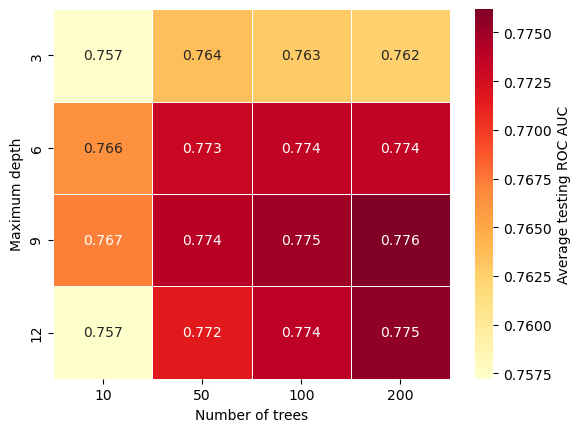

In [41]:
mean_test_score = cv_rf_results_df['mean_test_score'].values.reshape((4,4))
ax = sns.heatmap(mean_test_score, cmap="YlOrRd", annot=True, fmt=".3f", linewidths=.5)

ax.set_xlabel('Number of trees')
ax.set_ylabel('Maximum depth')

ax.set_xticklabels(rf_params['n_estimators'])
ax.set_yticklabels(rf_params['max_depth'])

cbar = ax.collections[0].colorbar
cbar.set_label('Average testing ROC AUC')

plt.show()

In [42]:
cv_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

Hence we conclude that from max_depth = [3, 6, 9, 12] depth of 9 is best. Also the best number of trees amongst those provided is 200. This we also see from the color map that as the number of trees increases our random forest performs better.

However unlike decision trees it is difficult to trace out a particular path as to how we arrived at a conclusion. Instead we see the usefulness of a particular feature, which is measured using a combination of the fraction of the training samples that were split and the decrease in the node impurity.

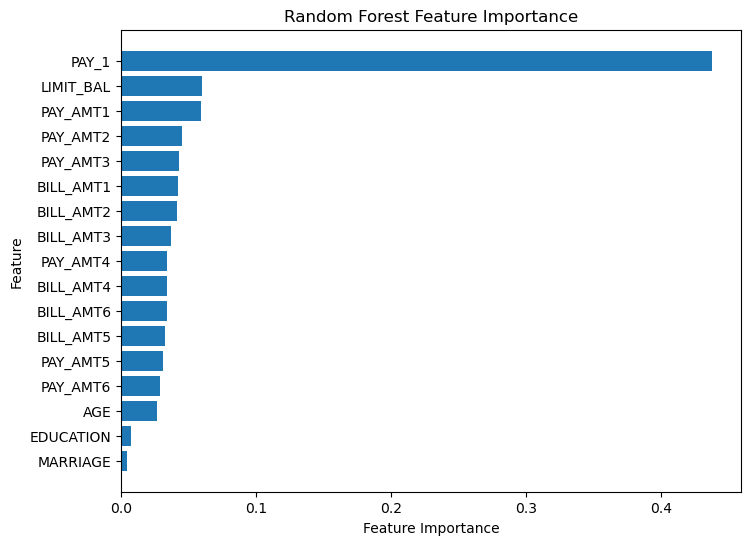

In [43]:
feat_imp_df = pd.DataFrame({'Importance':cv_rf.best_estimator_.feature_importances_}, index=features_response[:-1])
feat_imp_df_sorted = feat_imp_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(feat_imp_df_sorted.index, feat_imp_df_sorted['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()